In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
pd.read_csv("TSLA.csv")

,Date,Close/Last,Volume,Open,High,Low
0,06/16/2025,$329.13,83925860,$331.29,$332.05,$326.41
1,06/13/2025,$325.31,128964300,$313.97,$332.99,$313.30
2,06/12/2025,$319.11,105127500,$323.075,$332.56,$316.86
3,06/11/2025,$326.43,122611400,$334.395,$335.50,$322.50
4,06/10/2025,$326.09,151256500,$314.94,$327.83,$310.667
...,...,...,...,...,...,...
2510,06/23/2015,$17.8447,57969001,$17.3547,$17.8667,$17.238
2511,06/22/2015,$17.3193,68386046,$17.4767,$17.6267,$17.046
2512,06/19/2015,$17.5007,36883482,$17.4933,$17.5867,$17.34
2513,06/18/2015,$17.4593,41721594,$17.4667,$17.564,$17.3347


In [12]:
Data=pd.read_csv("TSLA.csv")

In [13]:
Delta=[]
for i in range(len(Data)):
  val_close= float((Data["Close/Last"][i]).replace('$', ''))
  val_open=float(Data['Open'][i].replace('$', ''))
  Delta.append(100*(val_close-val_open)/val_open)

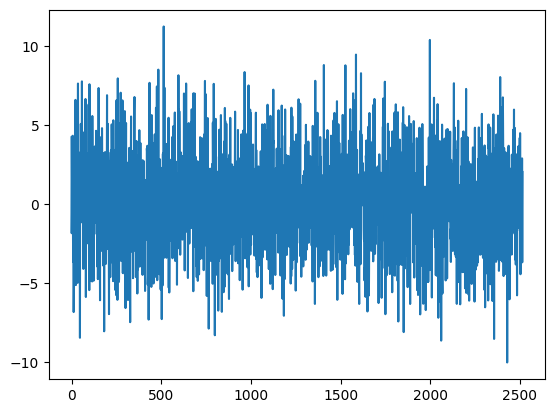

In [14]:
val_mean=np.mean(Delta)
var=np.var(Delta)
val_std=np.std(Delta)
plt.plot(np.random.normal(val_mean, val_std, len(Delta)))
plt.show()

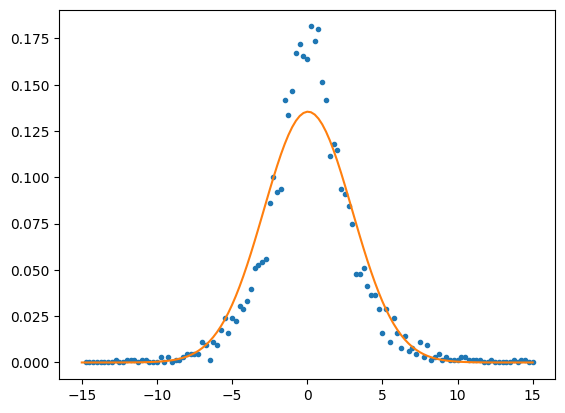

In [15]:
val, base = np.histogram(Delta, bins=np.arange(-15, 15+0.25, 0.25), density=True)
plt.plot(base[1:], val, '.')

X = np.arange(-15, 15+0.25, 0.25)
A = (1/np.sqrt(2*np.pi*val_std**2)) * np.exp(-((X - val_mean)**2)/(2*val_std**2))

plt.plot(X, A)
plt.show()


In [16]:
X= np.arange(-15, 15+0.25, 0.25)
A= 1/np.sqrt(2*np.pi*val_std**2)*np.exp(-(X-val_mean)/2*val_std**2)

In [17]:
Delta=np.array(Delta)
np.sum(Delta>=1)

np.int64(830)

In [18]:
np.sum(Delta>=1)

np.int64(830)

In [19]:
np.sum(Delta<=-1)

np.int64(834)

In [20]:
Data.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,06/16/2025,$329.13,83925860,$331.29,$332.05,$326.41
1,06/13/2025,$325.31,128964300,$313.97,$332.99,$313.30
2,06/12/2025,$319.11,105127500,$323.075,$332.56,$316.86
3,06/11/2025,$326.43,122611400,$334.395,$335.50,$322.50
4,06/10/2025,$326.09,151256500,$314.94,$327.83,$310.667
5,06/09/2025,$308.58,140908900,$285.955,$309.83,$281.85
6,06/06/2025,$295.14,164747700,$298.83,$305.50,$291.14
7,06/05/2025,$284.70,292818700,$322.49,$324.5499,$273.21
8,06/04/2025,$332.05,98912080,$345.095,$345.60,$327.3308
9,06/03/2025,$344.27,99324540,$346.595,$355.40,$343.04


In [21]:
Data.tail(10)

,Date,Close/Last,Volume,Open,High,Low
2505,06/30/2015,$17.884,46266502,$17.6533,$18.0613,$17.60
2506,06/29/2015,$17.468,52071754,$17.4633,$17.73,$17.38
2507,06/26/2015,$17.806,57444871,$17.926,$17.9407,$17.7333
2508,06/25/2015,$17.9193,42674874,$17.7633,$18.094,$17.6833
2509,06/24/2015,$17.678,36172362,$17.7987,$17.8233,$17.5813
2510,06/23/2015,$17.8447,57969001,$17.3547,$17.8667,$17.238
2511,06/22/2015,$17.3193,68386046,$17.4767,$17.6267,$17.046
2512,06/19/2015,$17.5007,36883482,$17.4933,$17.5867,$17.34
2513,06/18/2015,$17.4593,41721594,$17.4667,$17.564,$17.3347
2514,06/17/2015,$17.3607,82508359,$16.8113,$17.624,$16.8013


In [22]:
len(Delta)-np.sum(Delta>=1)-np.sum(Delta<=-1)

np.int64(851)

In [23]:
nu=1.0
def SNB(x):
    if x>1:
        out=0
    if np.abs(x)<1:
        out=1
    if x <=-1:
        out=2
    return out

SNB = np.vectorize(SNB)
State=SNB(Delta)

In [24]:
matC=np.zeros([3,3])

In [25]:
for i in range(len(State)-1):
    s1=State[i]
    s2=State[i+1]
    matC[s1][s2]+=1

In [26]:
matC

array([[247., 299., 283.],
       [285., 298., 268.],
       [298., 253., 283.]])

In [27]:
#Normalizando para volverlas probabilidades
matP=np.zeros([3,3])
for i in range(3):
    matP[i]=matC[i]/sum(matC[i])

In [28]:
matP

array([[0.29794934, 0.36067551, 0.34137515],
       [0.33490012, 0.35017626, 0.31492362],
       [0.35731415, 0.30335731, 0.33932854]])